In [36]:
!pip install gensim


In [37]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [38]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.834430992603302), ('pet', 0.7449565529823303), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307040214539), ('cats', 0.6471932530403137), ('rabbit', 0.6468629837036133)]
0.8798075


Part 1a

In [39]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

twitch = model['twitch']
print(model.most_similar('twitch'))

[('twitching', 0.564050555229187), ('muscles', 0.5623922348022461), ('flexing', 0.5436402559280396), ('twitches', 0.5201610326766968), ('fibers', 0.5190842151641846), ('droopy', 0.5093851089477539), ('reflexes', 0.5052903890609741), ('quickening', 0.5043982863426208), ('sizzle', 0.5019487738609314), ('atrophy', 0.4994564652442932)]


In [40]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827145099639893), ('france', 0.755802571773529), ('french', 0.7075164318084717), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627395629883), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.4533276855945587), ('non-arabs', 0.45208775997161865), ('amerindians', 0.4478239119052887), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.6792976260185242), ('horses', 0.6774963736534119), ('pigs', 0.6755764484405518), ('animal', 0.6683686971664429)]


In [41]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.5003889799118042)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089029550552368),
 ('doctors', 0.6793617606163025),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694241762161255),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466938257217407)]

Part 1b

In [42]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

print(model.most_similar(model["scientist"]-gender))
print(model.most_similar(model["scientist"]+gender))

[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.5003889799118042)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]
[('scientist', 0.8589305281639099), ('physicist', 0.7057017087936401), ('expert', 0.6705869436264038), ('biologist', 0.6302906274795532), ('professor', 0.6143324971199036), ('researcher', 0.6060958504676819), ('geologist', 0.5861785411834717), ('astronomer', 0.5750041007995605), ('engineer', 0.5710096955299377), ('m

Part 2: Visualization and Embeddings in Space

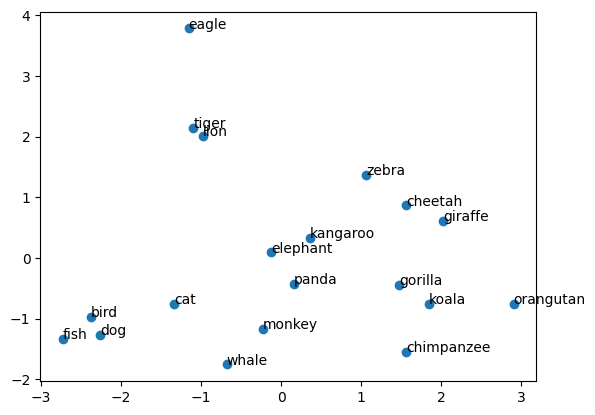

In [43]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

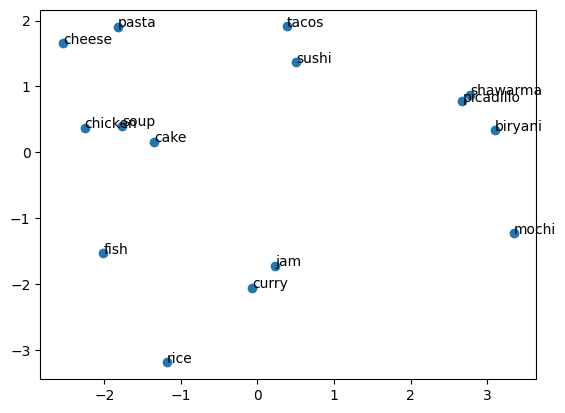

In [44]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["pasta","chicken","curry","sushi","shawarma","rice","fish","cheese","cake","mochi","tacos","soup","biryani","jam","picadillo", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))





In [45]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


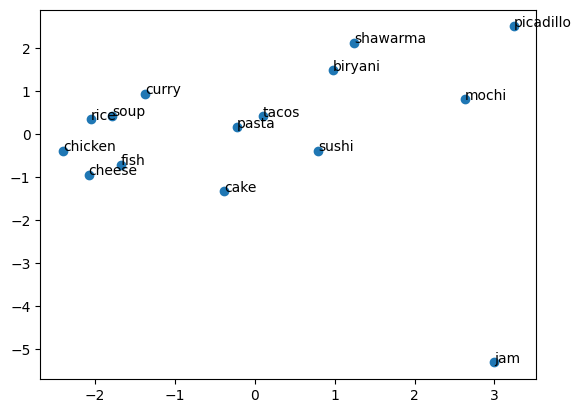

In [46]:
words=["pasta","chicken","curry","sushi","shawarma","rice","fish","cheese","cake","mochi","tacos","soup","biryani","jam","picadillo", ]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))


This distribution made more sense to me. Curry, chicken, and fish are all commonly eaten with rice. This may reflect that Twitter users are tweeting about meals they are eating, where as Wikipedia is a collection of information about food, and may not reflect human associations between foods as much.

Part 3: Embedding reddit posts

In [47]:
import pandas as pd

In [48]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [49]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [50]:
data['cleaned_text'] = data['text'].apply(clean)

In [51]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

In [52]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

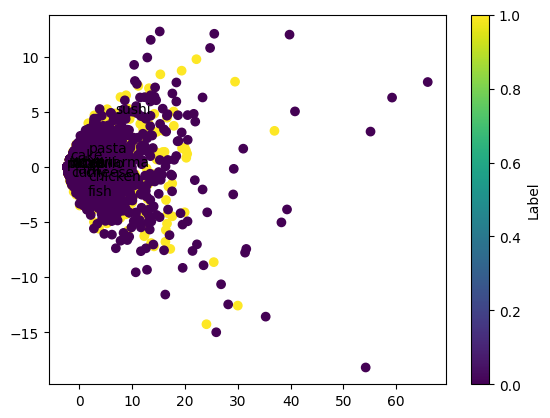

In [53]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
Vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words='english')

X = vectorizer.fit_transform(data["cleaned_text"])

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1],c=data['label'])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))
plt.colorbar(label='Label')
plt.show()

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

It appears that there is a lot of overlap between the subreddits

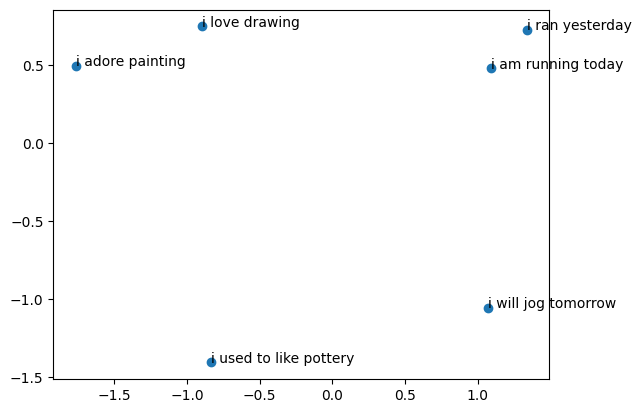

In [54]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\rebec\anaconda3\envs\is310-1\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rebec\anaconda3\envs\is310-1\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


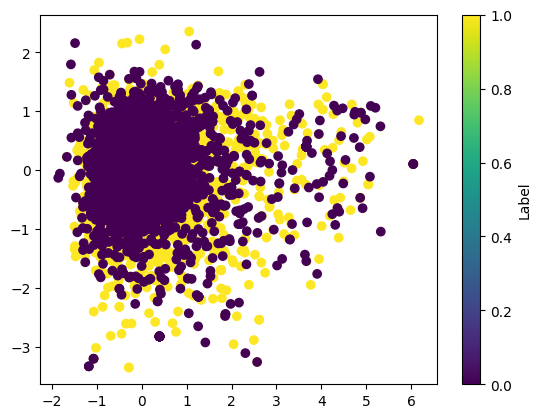

In [55]:

#use this function to calculate the average embedding of each post in the dataset
avg_embeddings_data=[avg_embedding(post, model) for post in data['cleaned_text']]

#plot the pca of the average embeddings, color by the "label" column
embeddings = [embedding for embedding in avg_embeddings_data if embedding.shape == (100,)]
labels = [label for embedding, label in zip(avg_embeddings_data, data['label']) if embedding.shape == (100,)]

embedding_array = np.array(embeddings)

pca_model = PCA(n_components=2)
reduced_embeddings = pca_model.fit_transform(embedding_array)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels) 
plt.colorbar(label='Label') 
plt.show()

#how is this plot different from the previous one?

#is there clear separation? 

There is clearer seperation but still a lot of overlap

Part 4: HuggingFace and BERT

In [56]:
!pip install transformers

In [57]:
!pip install tf-keras

In [58]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline # type: ignore

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [101]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?